# Assignment 1
Zhuoying Li
1004021202

In [16]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the excel file path and load the file into Pandas dataframe
excel_file_path = 'INF2178_A1_data.xlsx'
df = pd.read_excel(excel_file_path)

In [3]:
# Get some basic information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OCCUPANCY_DATE          50944 non-null  datetime64[ns]
 1   ORGANIZATION_NAME       50944 non-null  object        
 2   PROGRAM_ID              50944 non-null  int64         
 3   PROGRAM_NAME            50909 non-null  object        
 4   SECTOR                  50944 non-null  object        
 5   PROGRAM_MODEL           50942 non-null  object        
 6   OVERNIGHT_SERVICE_TYPE  50942 non-null  object        
 7   PROGRAM_AREA            50942 non-null  object        
 8   SERVICE_USER_COUNT      50944 non-null  int64         
 9   CAPACITY_TYPE           50944 non-null  object        
 10  CAPACITY_ACTUAL_BED     32399 non-null  float64       
 11  OCCUPIED_BEDS           32399 non-null  float64       
 12  CAPACITY_ACTUAL_ROOM    18545 non-null  float6

In [4]:
# Measures of Central Tendency
mean = df.mean(numeric_only=True)
median = df.median(numeric_only=True)
print("Mean:\n" + str(mean) + '\n')
print("Median:\n" + str(median) + '\n')

# Frequency Distribution for categorical data
program_model_freq = df['PROGRAM_MODEL'].value_counts()
program_area_freq = df['PROGRAM_AREA'].value_counts()
sector_freq = df['SECTOR'].value_counts()
capacity_type_freq = df['CAPACITY_TYPE'].value_counts()
org_name_freq = df['ORGANIZATION_NAME'].value_counts()
print("PROGRAM_MODEL:\n" + str(program_model_freq) + '\n')
print("PROGRAM_AREA:\n" + str(program_area_freq) + '\n')
print("SECTOR:\n" + str(sector_freq) + '\n')
print("CAPACITY_TYPE:\n" + str(capacity_type_freq) + '\n')
print("ORGANIZATION_NAME:\n" + str(org_name_freq) + '\n')

Mean:
PROGRAM_ID              13986.125844
SERVICE_USER_COUNT         45.727171
CAPACITY_ACTUAL_BED        31.627149
OCCUPIED_BEDS              29.780271
CAPACITY_ACTUAL_ROOM       55.549259
OCCUPIED_ROOMS             52.798598
dtype: float64

Median:
PROGRAM_ID              14251.0
SERVICE_USER_COUNT         28.0
CAPACITY_ACTUAL_BED        25.0
OCCUPIED_BEDS              23.0
CAPACITY_ACTUAL_ROOM       35.0
OCCUPIED_ROOMS             34.0
dtype: float64

PROGRAM_MODEL:
PROGRAM_MODEL
Emergency       41541
Transitional     9401
Name: count, dtype: int64

PROGRAM_AREA:
PROGRAM_AREA
Base Shelter and Overnight Services System    34398
COVID-19 Response                             15785
Temporary Refugee Response                      572
Winter Programs                                 187
Name: count, dtype: int64

SECTOR:
SECTOR
Mixed Adult    15533
Men            12241
Women           9258
Youth           8263
Families        5649
Name: count, dtype: int64

CAPACITY_TYPE:
CAPACITY_TYPE
Be

In [5]:
# Seperate the data into room based and bed based, also call .copy() because we
# are going to modify both dataframes.
df_room_based = df[df['CAPACITY_TYPE'] == 'Room Based Capacity'].copy()
df_bed_based = df[df['CAPACITY_TYPE'] == 'Bed Based Capacity'].copy()

# Compute occupancy rate for both data frames
df_room_based['OCCUPANCY_RATE'] = df_room_based['OCCUPIED_ROOMS'] / df_room_based['CAPACITY_ACTUAL_ROOM']
df_bed_based['OCCUPANCY_RATE'] = df_bed_based['OCCUPIED_BEDS'] / df_bed_based['CAPACITY_ACTUAL_BED']

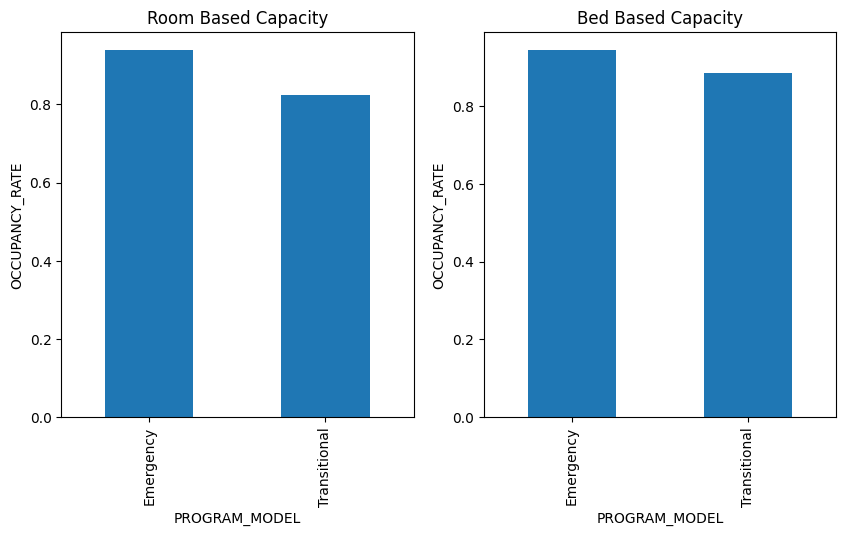

In [7]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Create a bar plot for room-based capacity
df_room_based.groupby('PROGRAM_MODEL')['OCCUPANCY_RATE'].mean().plot(kind='bar', ax=axs[0])
axs[0].set_title('Room Based Capacity')
axs[0].set_ylabel('OCCUPANCY_RATE')

# Create a bar plot for bed-based capacity
df_bed_based.groupby('PROGRAM_MODEL')['OCCUPANCY_RATE'].mean().plot(kind='bar', ax=axs[1])
axs[1].set_title('Bed Based Capacity')
axs[1].set_ylabel('OCCUPANCY_RATE')

# Display the plots
plt.show()

In [19]:
# Compute the t-stat for room based capacity occupancy rate, for different program models
emergency_rate = df_room_based[df_room_based['PROGRAM_MODEL'] == 'Emergency']['OCCUPANCY_RATE']
transitional_rate = df_room_based[df_room_based['PROGRAM_MODEL'] == 'Transitional']['OCCUPANCY_RATE']

t_stat, p_val = stats.ttest_ind(emergency_rate, transitional_rate, equal_var=False)

print(f'T-stat: {t_stat}')
print(f'P-value: {p_val}')

T-stat: 31.71080126309493
P-value: 4.4252019739840735e-150


In [20]:
# Compute the t-stat for bed based capacity occupancy rate, for different program models
emergency_rate = df_bed_based[df_bed_based['PROGRAM_MODEL'] == 'Emergency']['OCCUPANCY_RATE']
transitional_rate = df_bed_based[df_bed_based['PROGRAM_MODEL'] == 'Transitional']['OCCUPANCY_RATE']

t_stat, p_val = stats.ttest_ind(emergency_rate, transitional_rate, equal_var=False)

print(f'T-stat: {t_stat}')
print(f'P-value: {p_val}')

T-stat: 36.78483679745313
P-value: 7.273950955976339e-283


In [8]:
# Join two dataframes so we get occupancy rate for both, easier to draw graphs later on
combined_df = pd.concat([df_room_based, df_bed_based])

# We are going to try draw bar plot and box plot for each categorical variable
# so defining a function here for easy reuse
def draw_bar_and_box_plot(cat_variable, num_variable):
    # Calculate the mean occupancy rate for each value in cat_variable for the bar graph
    mean_occupancy = combined_df.groupby(cat_variable)[num_variable].mean()
    
    # Create a figure and a set of subplots
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))
    
    # Create a bar plot for the mean occupancy rate by cat_variable
    mean_occupancy.plot(kind='bar', ax=axs[0])
    
    # Set the title and labels for the bar plot
    axs[0].set_title('Mean ' + num_variable + ' by ' + cat_variable)
    axs[0].set_xlabel(cat_variable)
    axs[0].set_ylabel('Mean ' + num_variable)
    
    # Create a box plot for the occupancy rates by cat_variable
    combined_df.boxplot(column=num_variable, by=cat_variable, ax=axs[1])
    
    # Set the title and labels for the box plot
    axs[1].set_title(num_variable + ' Distribution by ' + cat_variable)
    axs[1].set_xlabel(cat_variable)
    axs[1].set_ylabel(num_variable)
    # Make box plot's X label vertical, for some reason bar plot is already vertical
    axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
    
    plt.suptitle('') # Remove the automatic suptitle created by boxplot
    plt.show()

In [10]:
# Let's do some t-tests on occupancy rate between COVID-19 Resposnse and Winter Programs
# Select the occupancy rates for each program area
covid_rates = combined_df[combined_df['PROGRAM_AREA'] == 'COVID-19 Response']['OCCUPANCY_RATE']
winter_rates = combined_df[combined_df['PROGRAM_AREA'] == 'Winter Programs']['OCCUPANCY_RATE']

# Perform the t-test
t_stat, p_val = stats.ttest_ind(covid_rates, winter_rates, equal_var=False)

print(f'T-stat: {t_stat}')
print(f'P-value: {p_val}')

T-stat: 4.655048091171439
P-value: 6.087105413029384e-06


In [12]:
# Since our P-value is much less than 0.05, we have strong evidence to reject the null hypothesis
# in another word, the mean OCCUPANCY_RATE is different between these two program areas

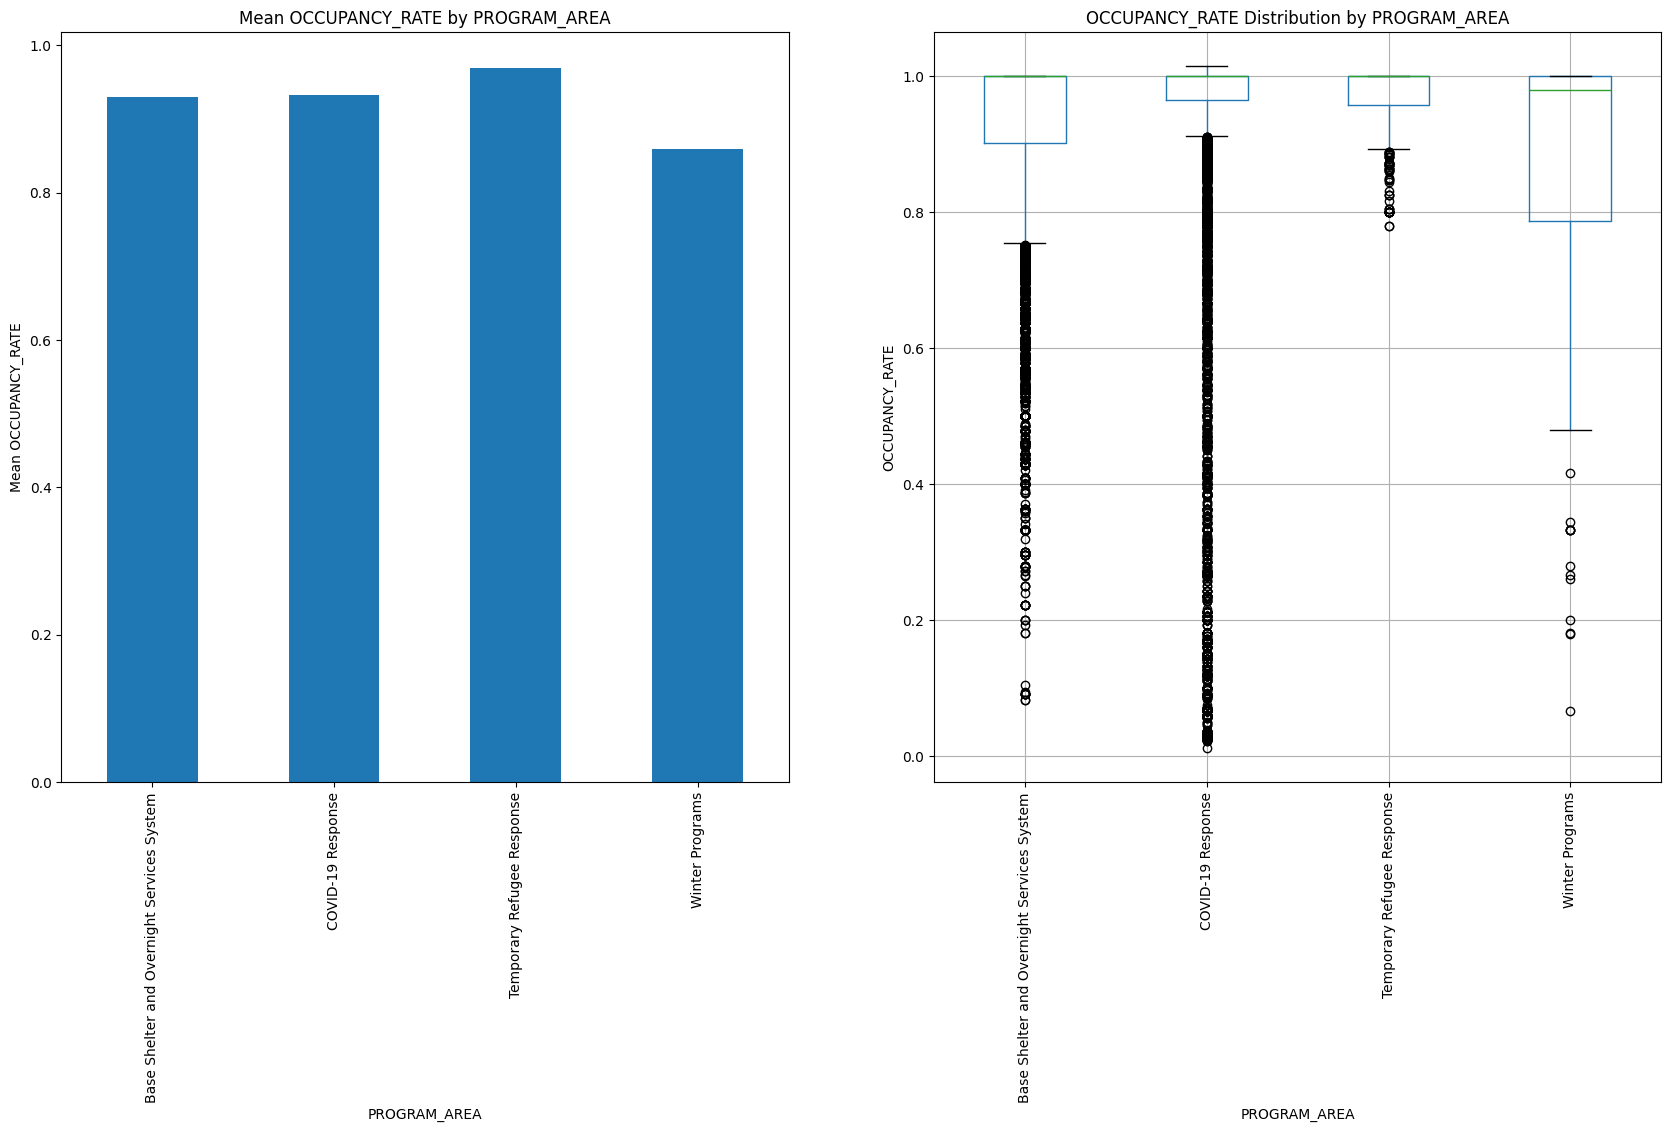

In [13]:
draw_bar_and_box_plot('PROGRAM_AREA', 'OCCUPANCY_RATE')

In [14]:
# Let's do some t-tests on occupancy rate between City of Toronto and Homes First Society
# Select the occupancy rates for each program area
covid_rates = combined_df[combined_df['ORGANIZATION_NAME'] == 'City of Toronto']['OCCUPANCY_RATE']
winter_rates = combined_df[combined_df['ORGANIZATION_NAME'] == 'Homes First Society']['OCCUPANCY_RATE']

# Perform the t-test
t_stat, p_val = stats.ttest_ind(covid_rates, winter_rates, equal_var=False)

print(f'T-stat: {t_stat}')
print(f'P-value: {p_val}')

T-stat: -30.32170546597067
P-value: 8.89000830266284e-197


In [ ]:
# Again, we have a very small p-value, indicating we should reject our null hypothesis.

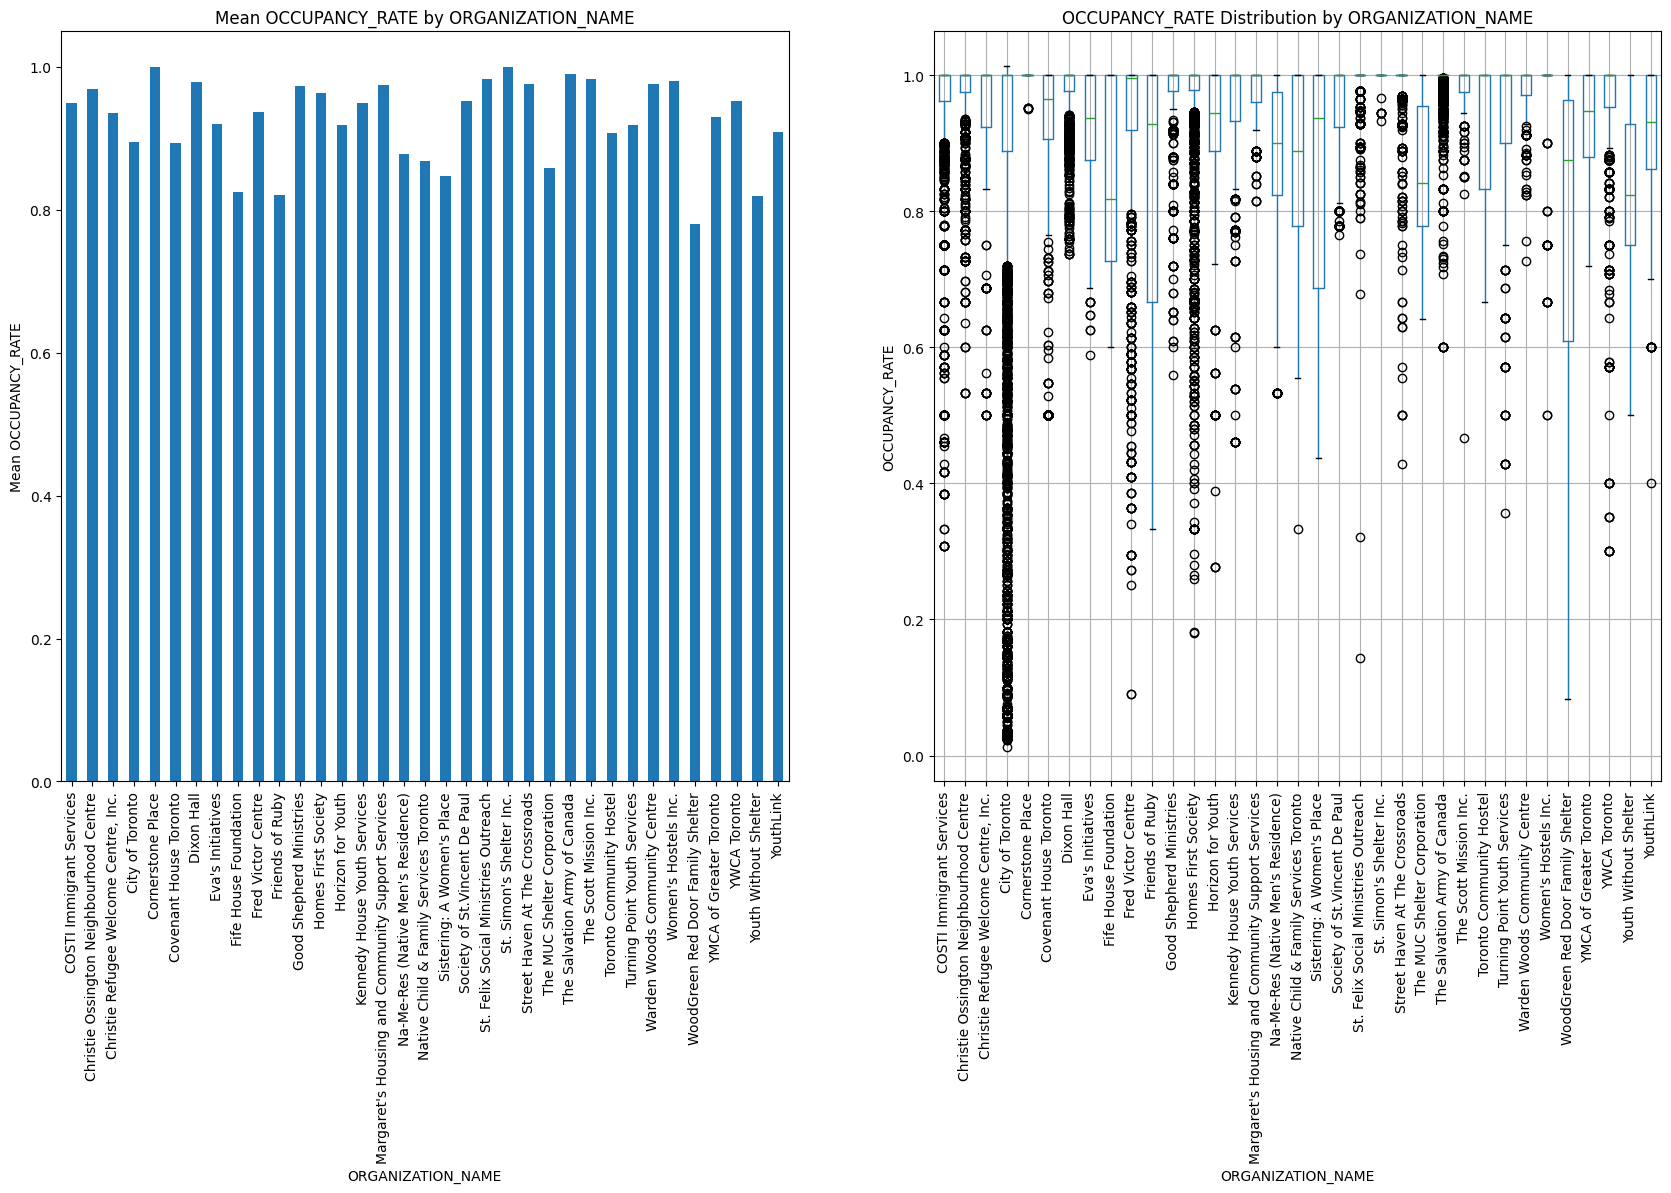

In [24]:
draw_bar_and_box_plot('ORGANIZATION_NAME', 'OCCUPANCY_RATE')

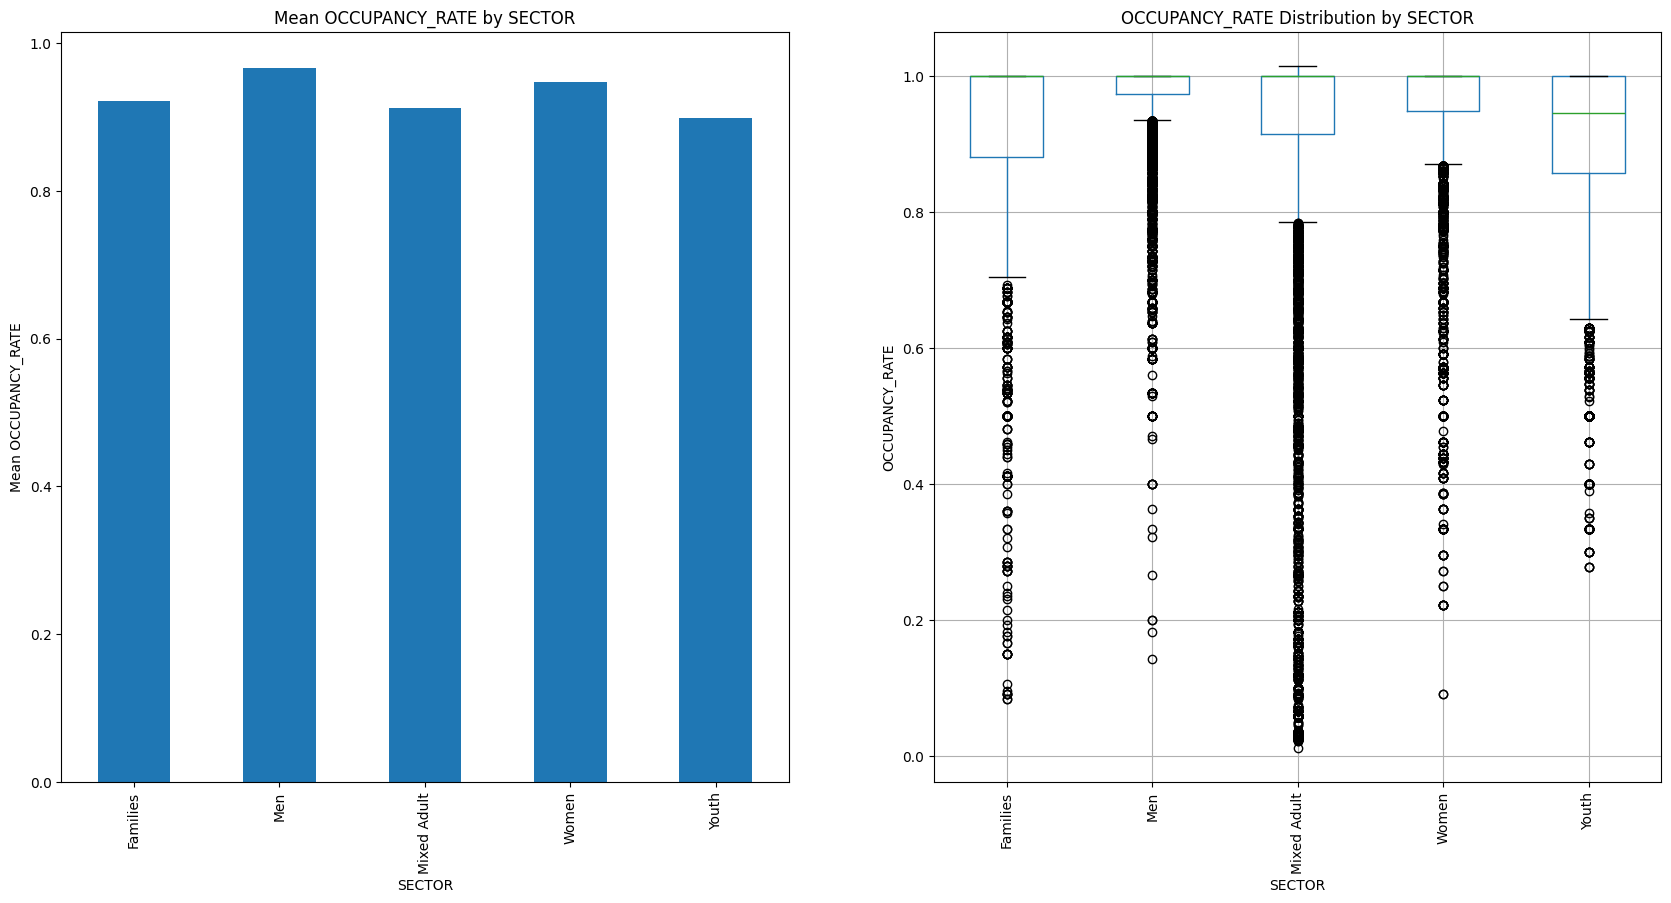

In [25]:
draw_bar_and_box_plot('SECTOR', 'OCCUPANCY_RATE')

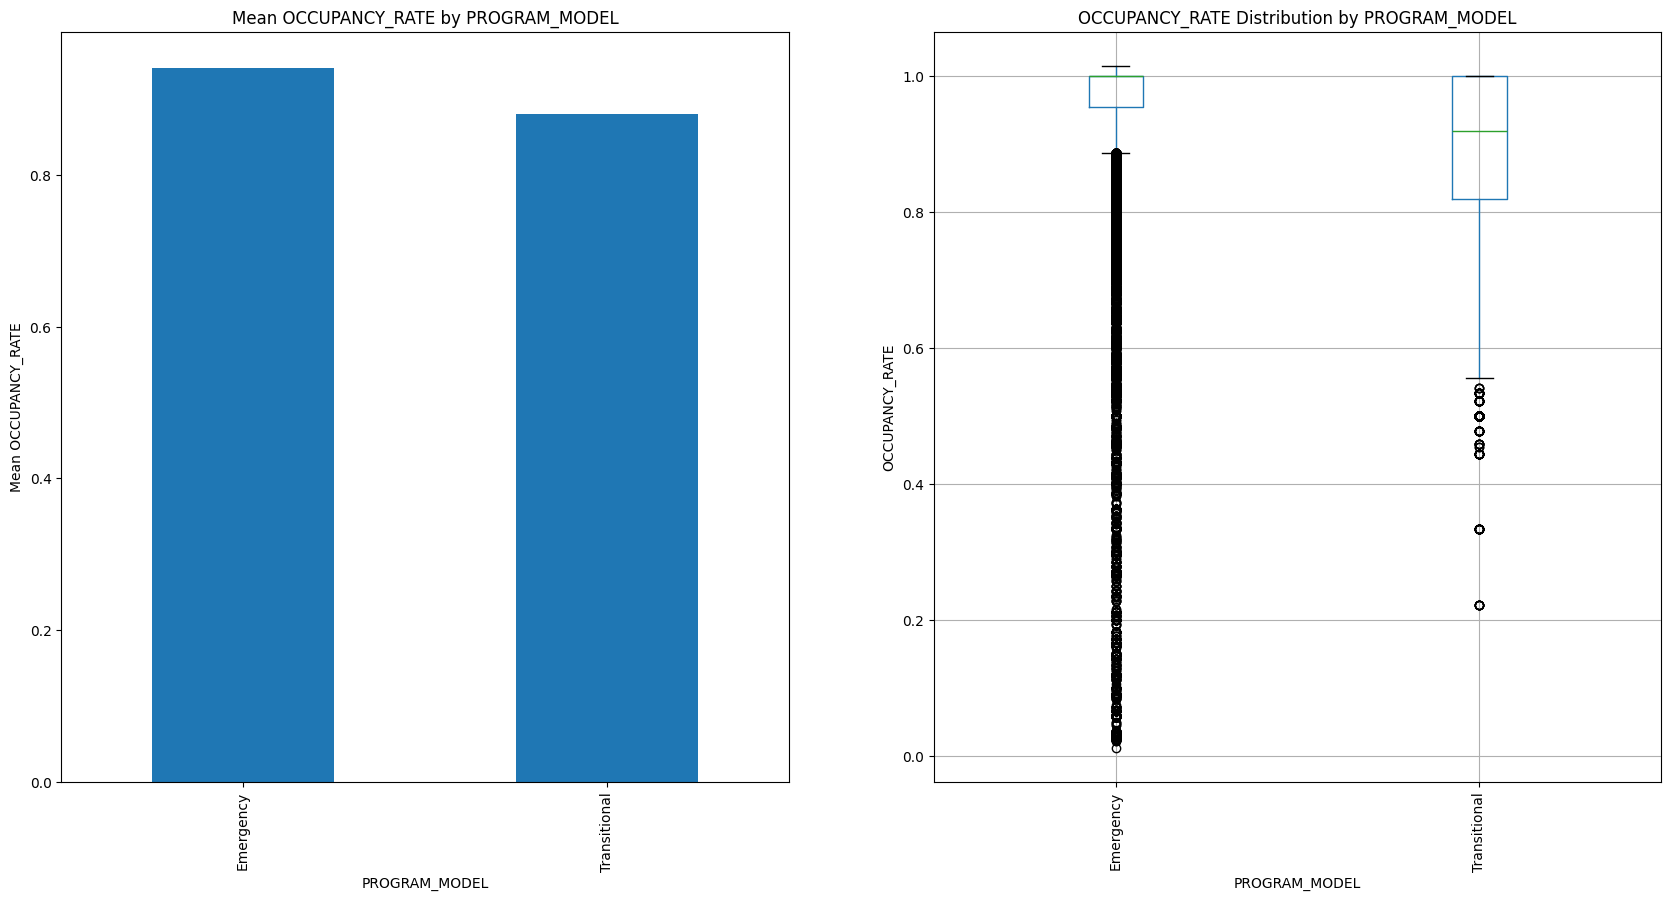

In [27]:
draw_bar_and_box_plot('PROGRAM_MODEL', 'OCCUPANCY_RATE')

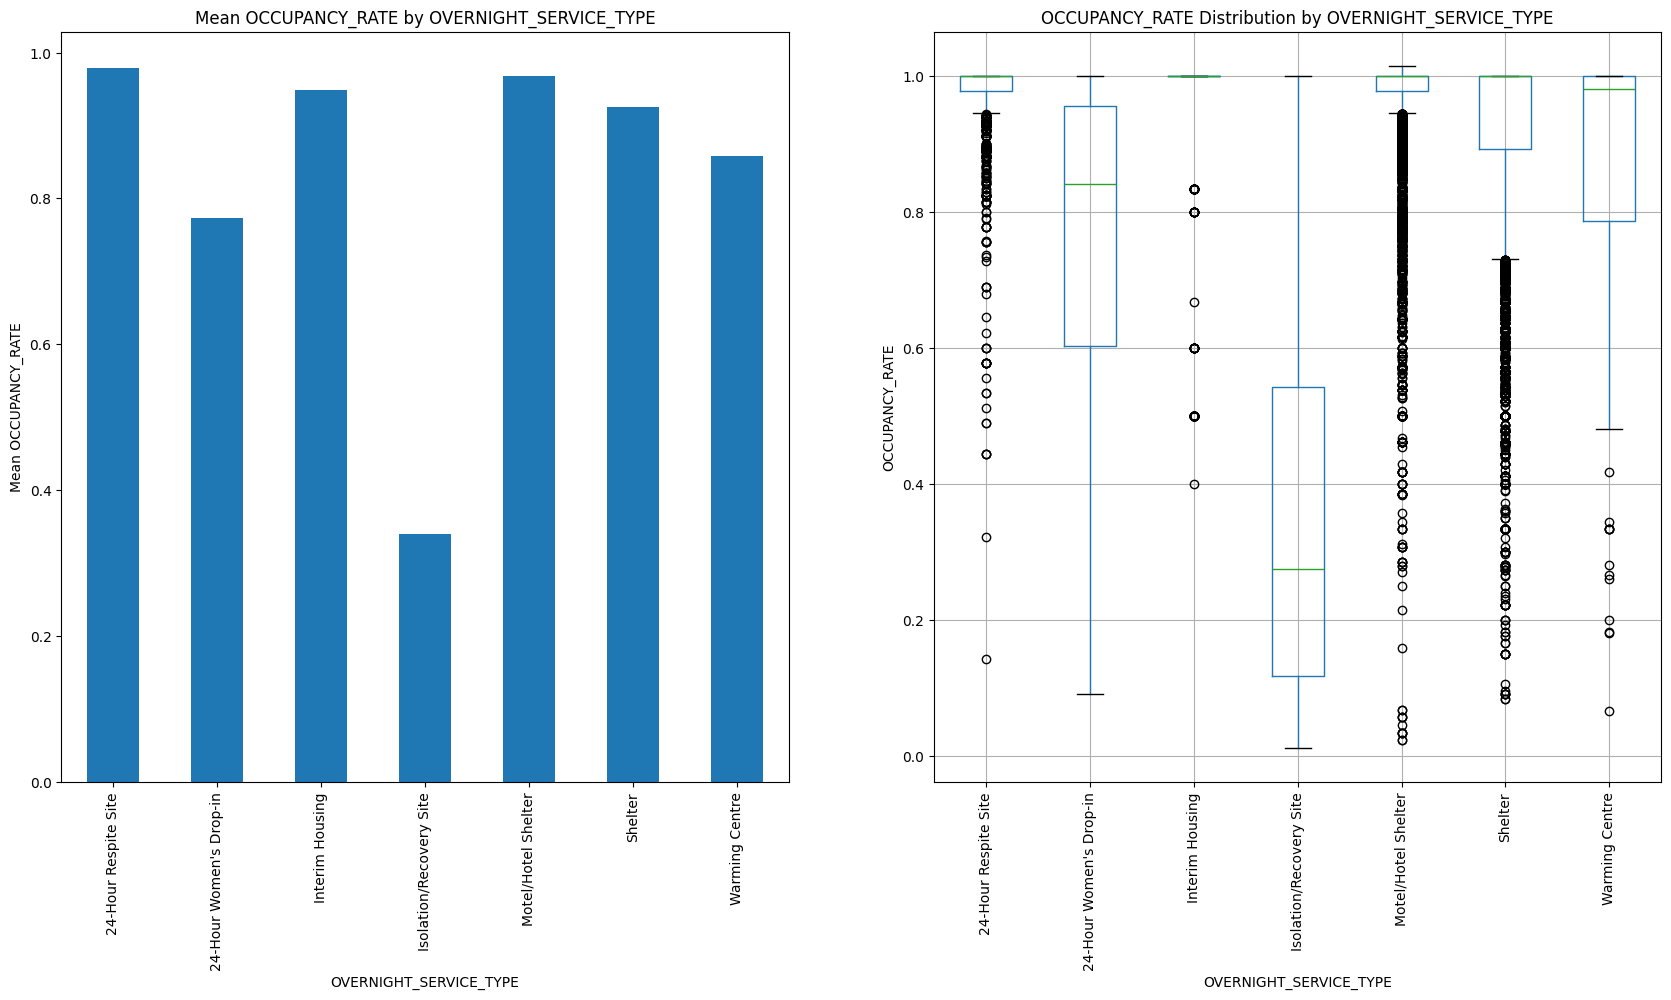

In [28]:
draw_bar_and_box_plot('OVERNIGHT_SERVICE_TYPE', 'OCCUPANCY_RATE')

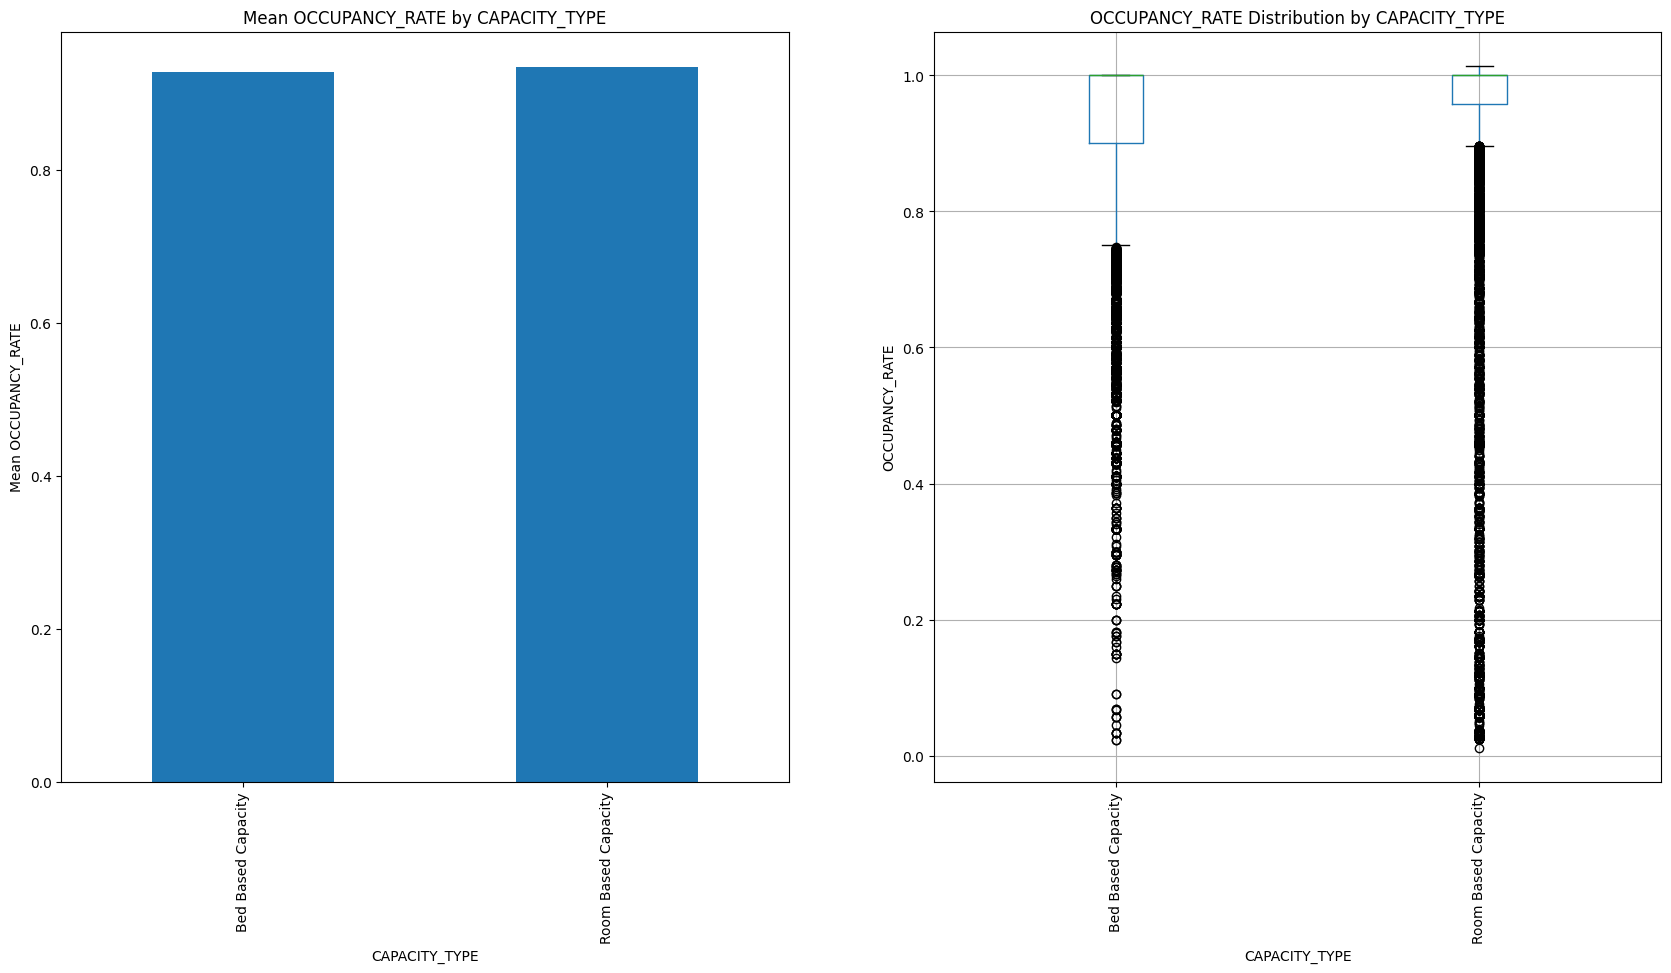

In [29]:
draw_bar_and_box_plot('CAPACITY_TYPE', 'OCCUPANCY_RATE')

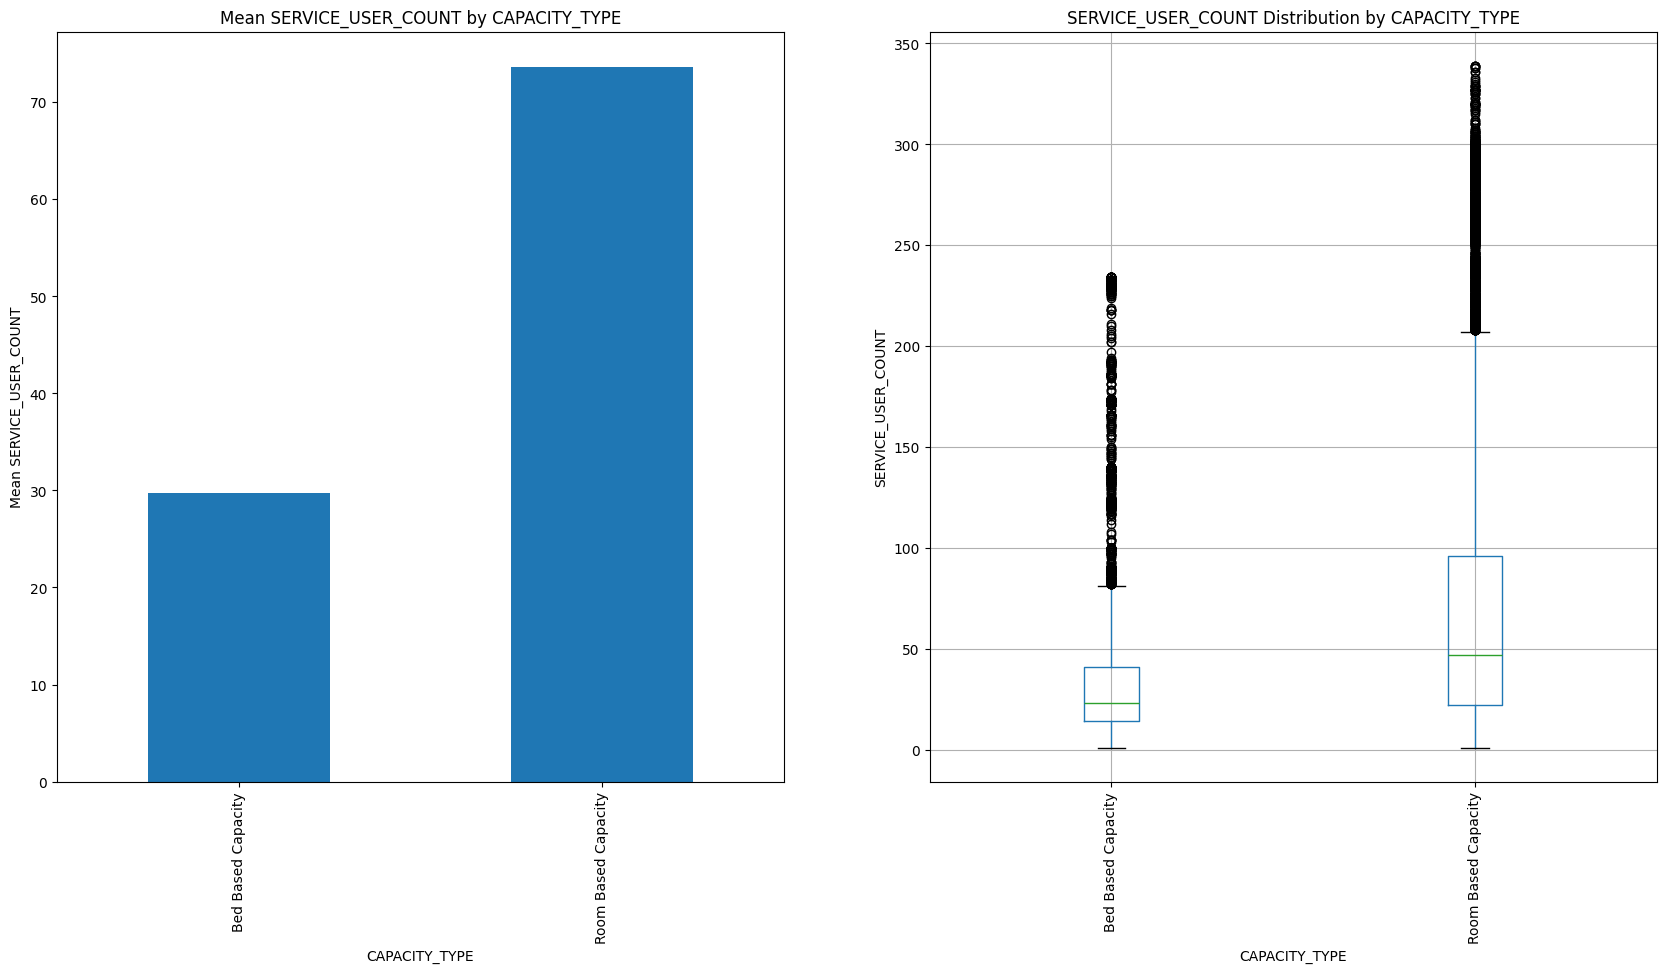

In [30]:
draw_bar_and_box_plot('CAPACITY_TYPE', 'SERVICE_USER_COUNT')

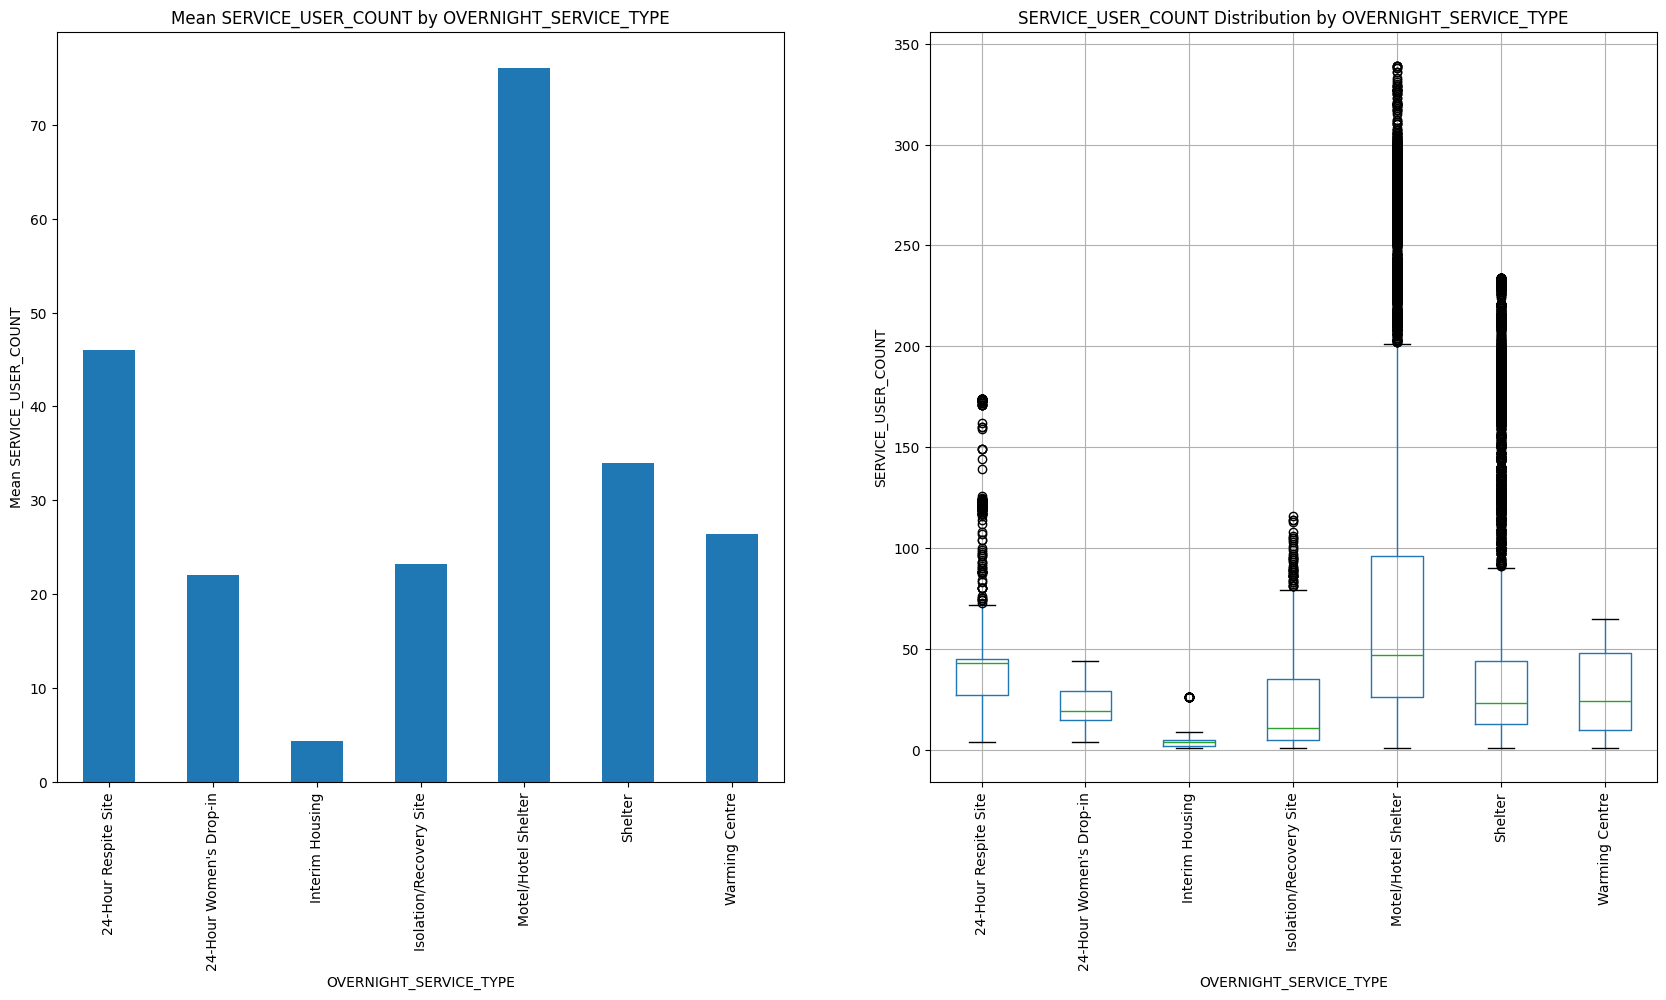

In [31]:
draw_bar_and_box_plot('OVERNIGHT_SERVICE_TYPE', 'SERVICE_USER_COUNT')

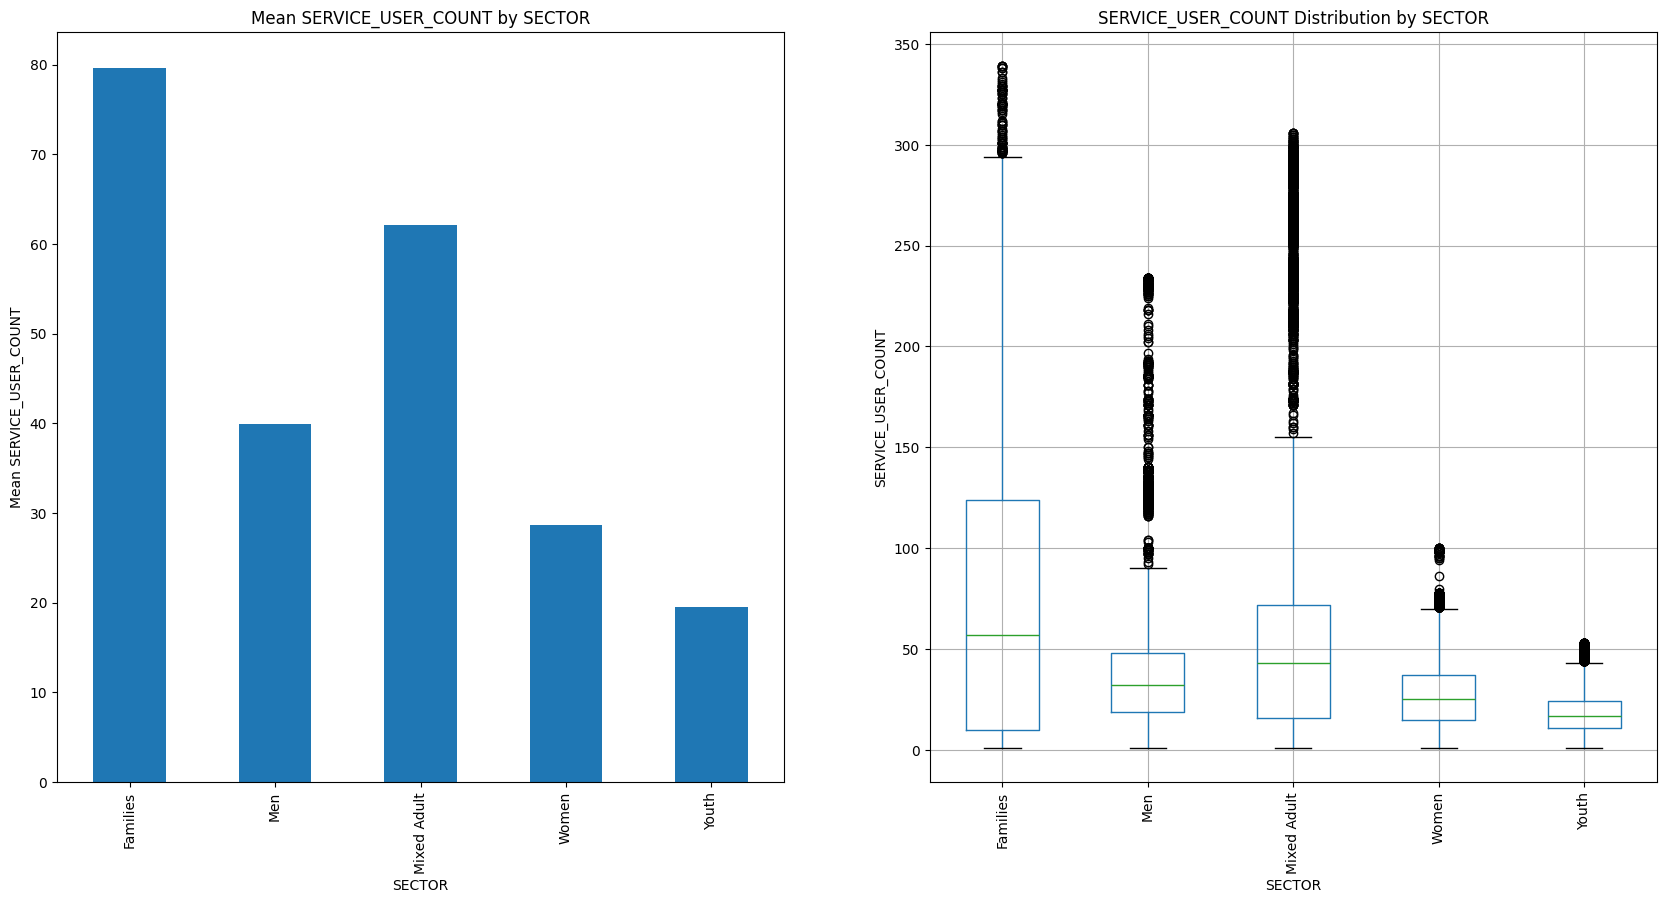

In [32]:
draw_bar_and_box_plot('SECTOR', 'SERVICE_USER_COUNT')

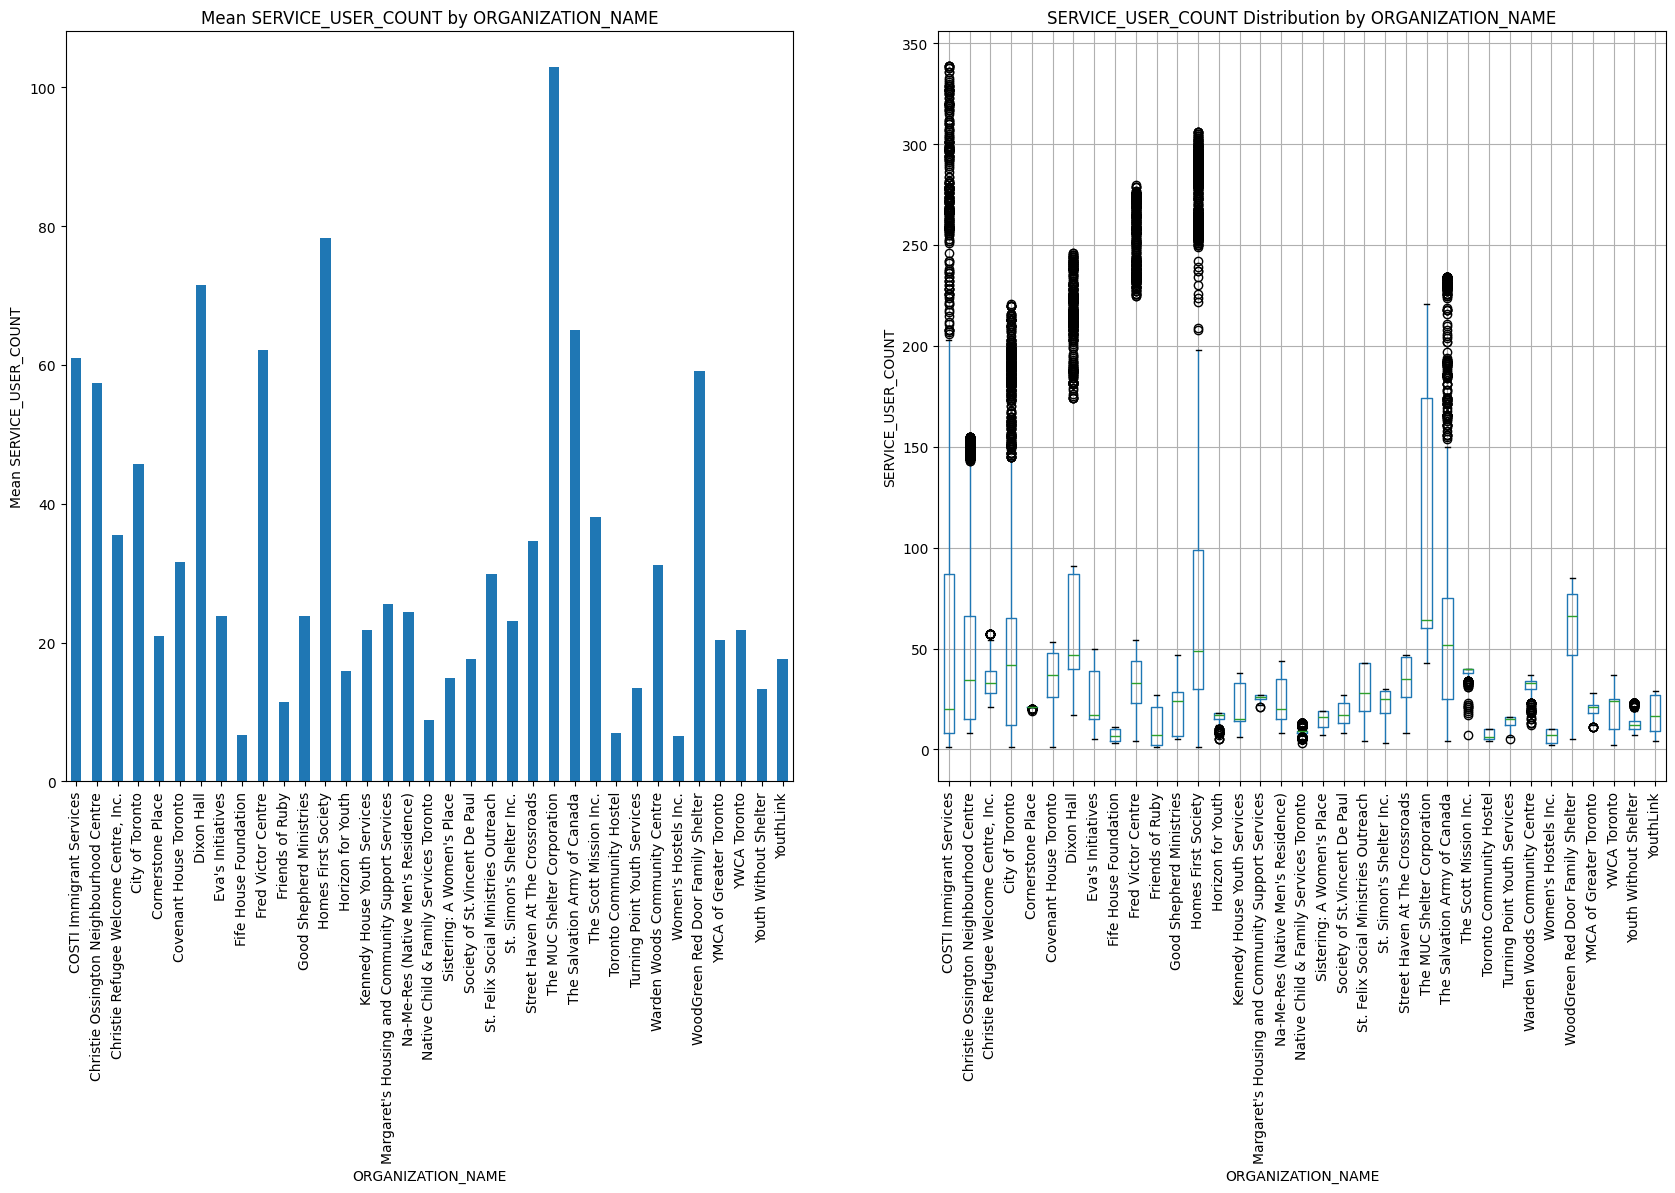

In [33]:
draw_bar_and_box_plot('ORGANIZATION_NAME', 'SERVICE_USER_COUNT')

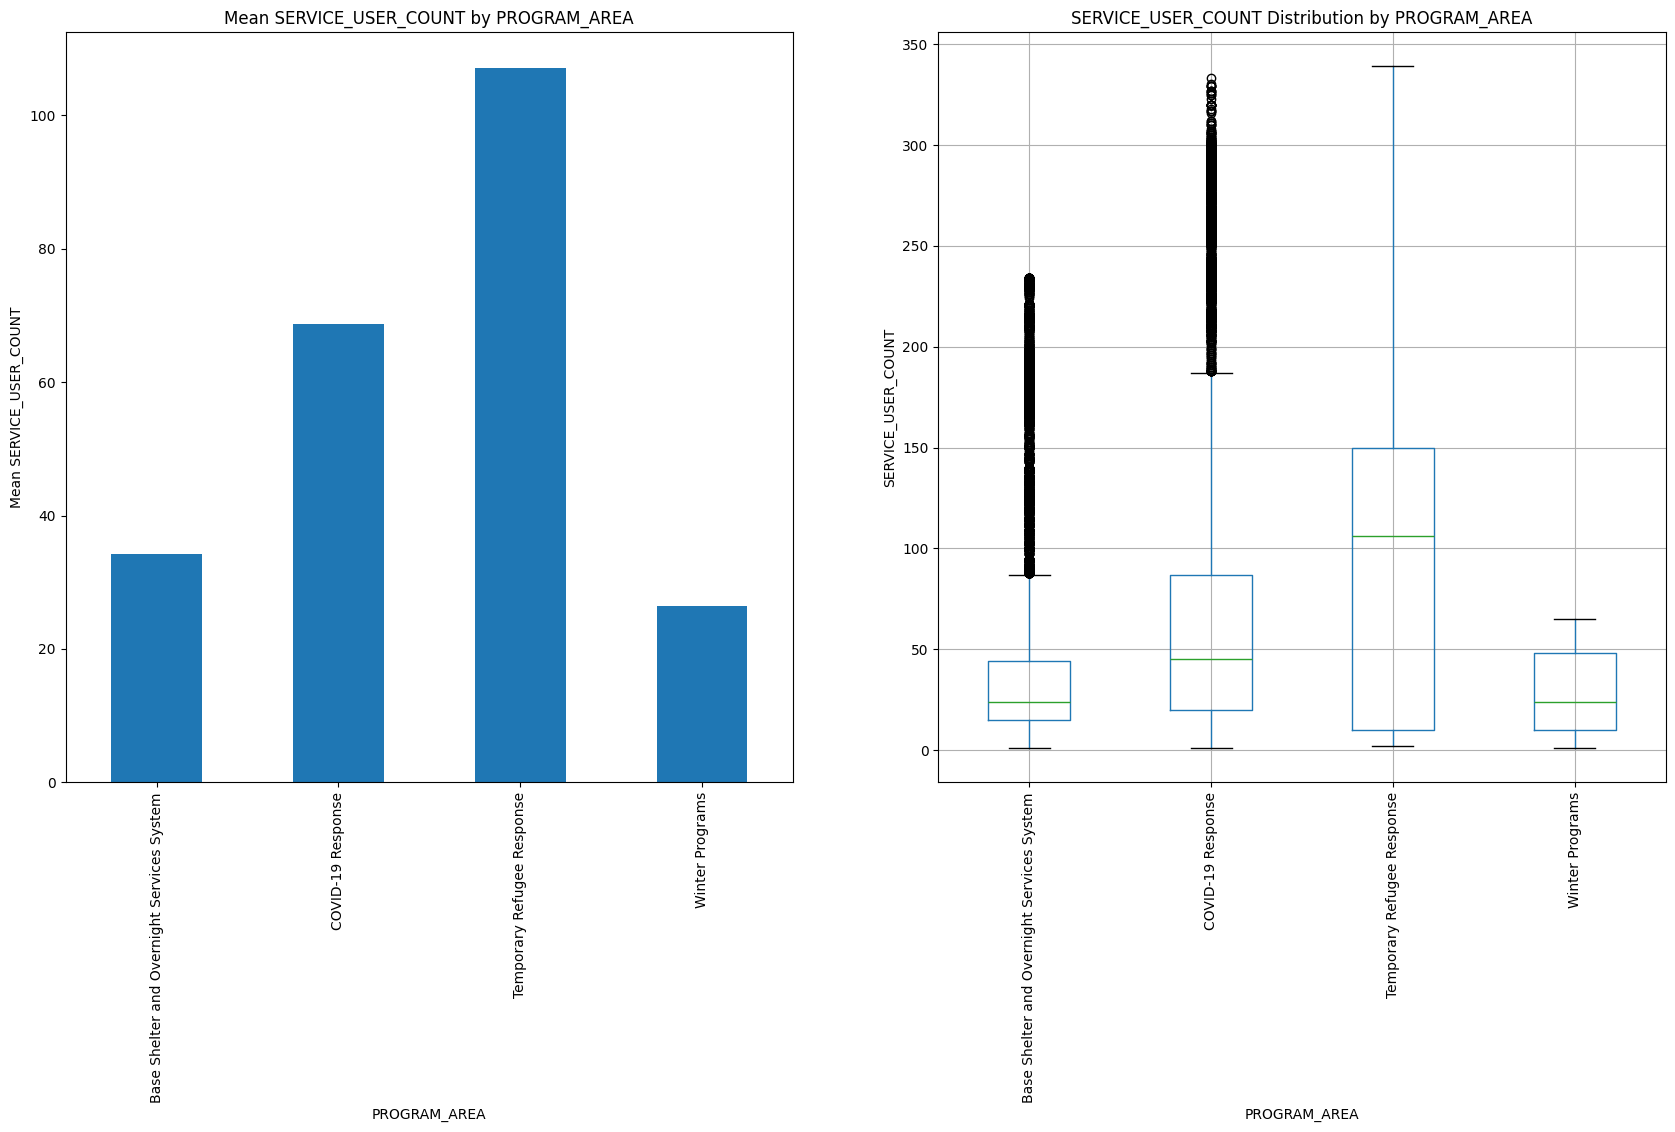

In [35]:
draw_bar_and_box_plot('PROGRAM_AREA', 'SERVICE_USER_COUNT')

In [15]:
# Now we have the box plots, we can see some categories are more normally distributed
# compared to others. Let's see what is happening by drawing some histograms for interesting
# categories.

def draw_historgram(cat_variable, match):
    # Select the occupancy rates for the specific variable
    occupancy_rates = combined_df.loc[combined_df[cat_variable] == match, 'OCCUPANCY_RATE']
    
    # Create a figure
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Create a histogram
    ax.hist(occupancy_rates, bins=15, edgecolor='black')
    
    # Set the title and labels
    ax.set_title('Occupancy Rate Distribution for ' + cat_variable + ' = ' + match)
    ax.set_xlabel('Occupancy Rate')
    ax.set_ylabel('Frequency')
    
    # Display the plot
    plt.show()

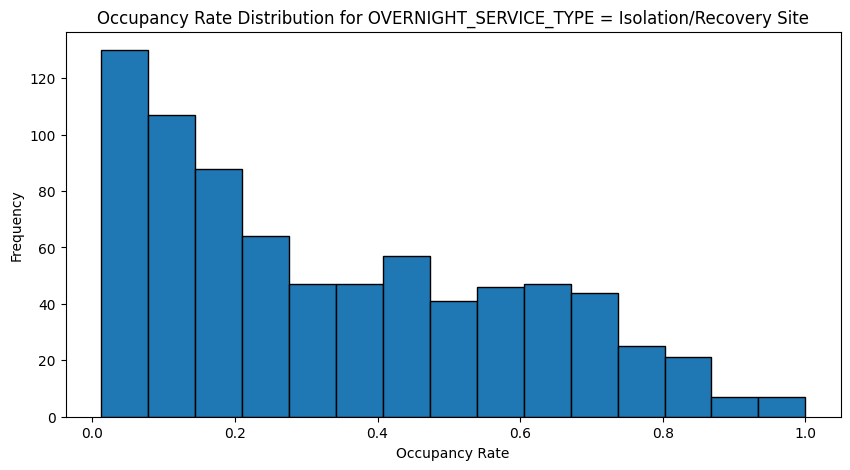

In [16]:
draw_historgram('OVERNIGHT_SERVICE_TYPE', 'Isolation/Recovery Site')

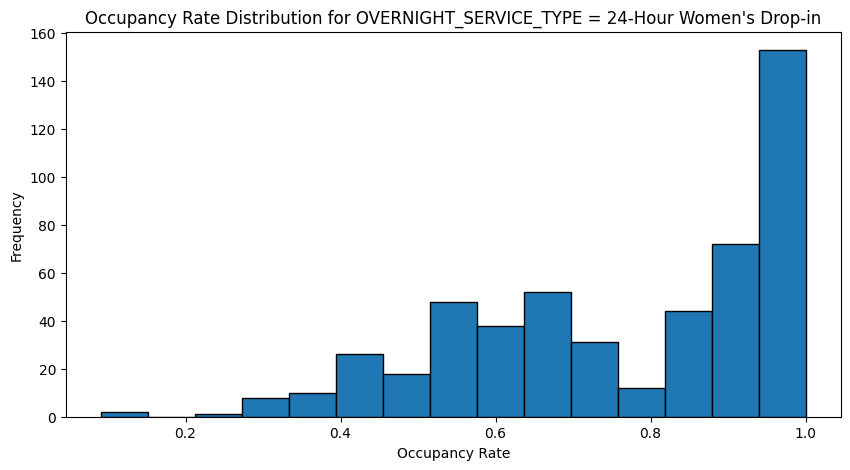

In [17]:
draw_historgram('OVERNIGHT_SERVICE_TYPE', '24-Hour Women\'s Drop-in')

In [15]:
# Function to draw QQ plot, this will also draw nan in some cases, but it is fine, we can simply ignore
# the nan graph.
def draw_qq_plot_for_var(cat_variable):
    # Get unique types
    types = combined_df[cat_variable].unique()
    
    # Create subplots
    fig, axs = plt.subplots(nrows=len(types), ncols=1, figsize=(10, 5 * len(types)))
    
    # Loop through each service type and create a QQ plot
    for i, type in enumerate(types):
        # Select the data for the specific service type
        data = combined_df[combined_df[cat_variable] == type]['OCCUPANCY_RATE']
        
        # Generate the QQ plot data
        qq = stats.probplot(data, dist="norm")
        
        # Plot the QQ plot
        axs[i].plot(qq[0][0], qq[0][1], 'o')
        axs[i].plot(qq[0][0], qq[1][1] + qq[1][0]*qq[0][0], 'r-')  # Add the reference line
        axs[i].set_title(f'QQ Plot of Occupancy Rate for {type}')
        axs[i].set_xlabel('Theoretical Quantiles')
        axs[i].set_ylabel('Sample Quantiles')
    
    plt.tight_layout()
    plt.show()

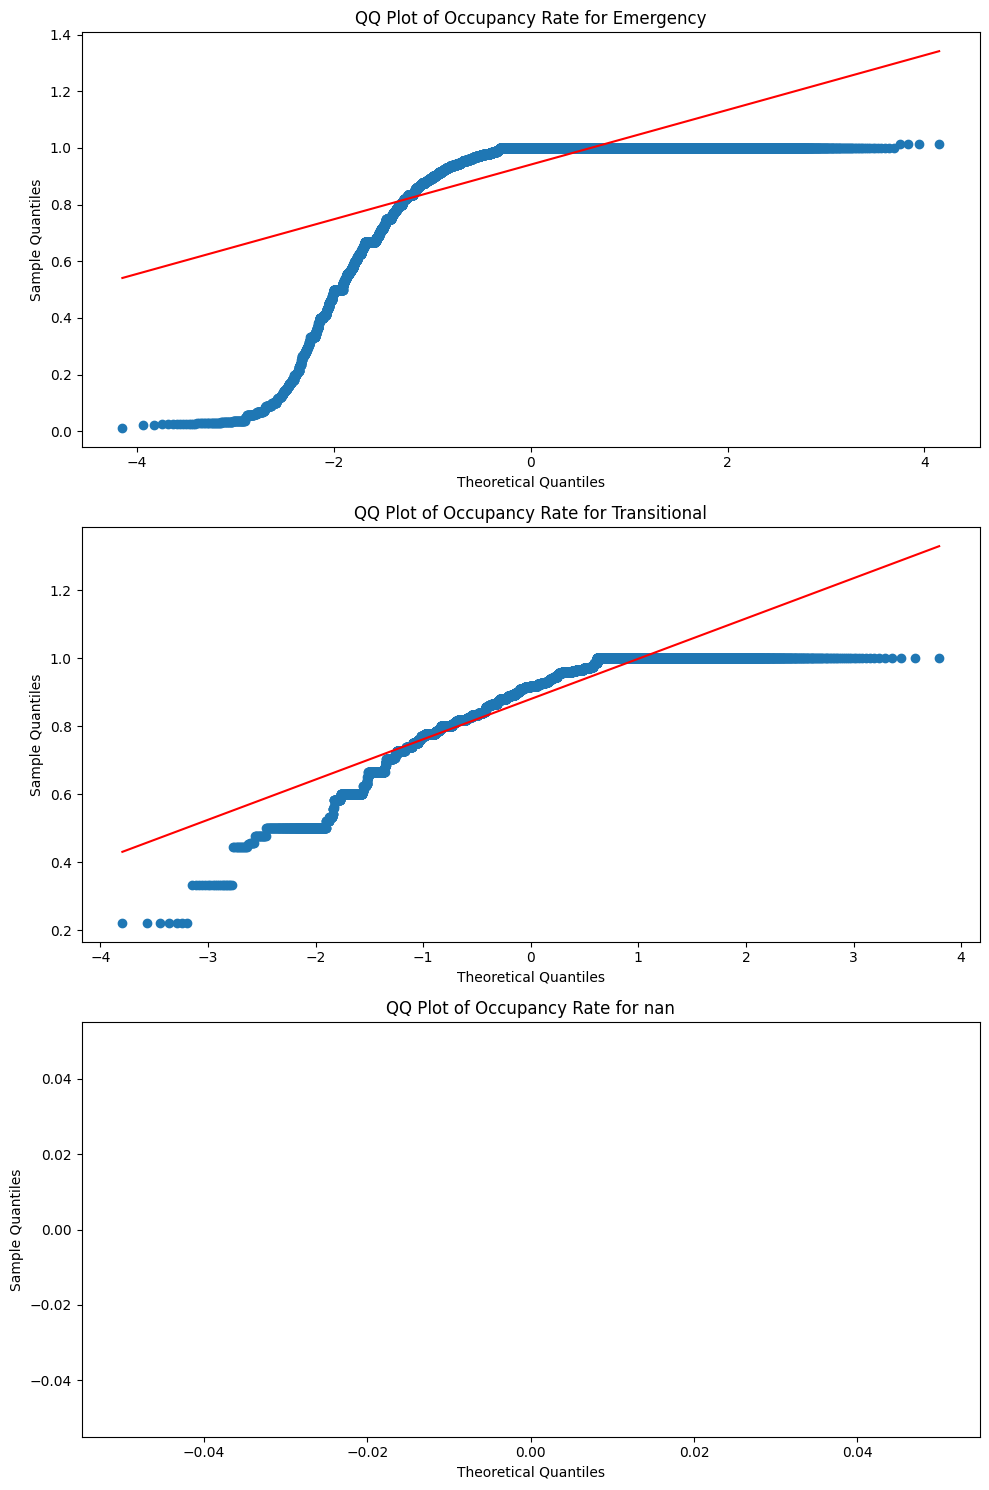

In [19]:
draw_qq_plot_for_var('PROGRAM_MODEL')

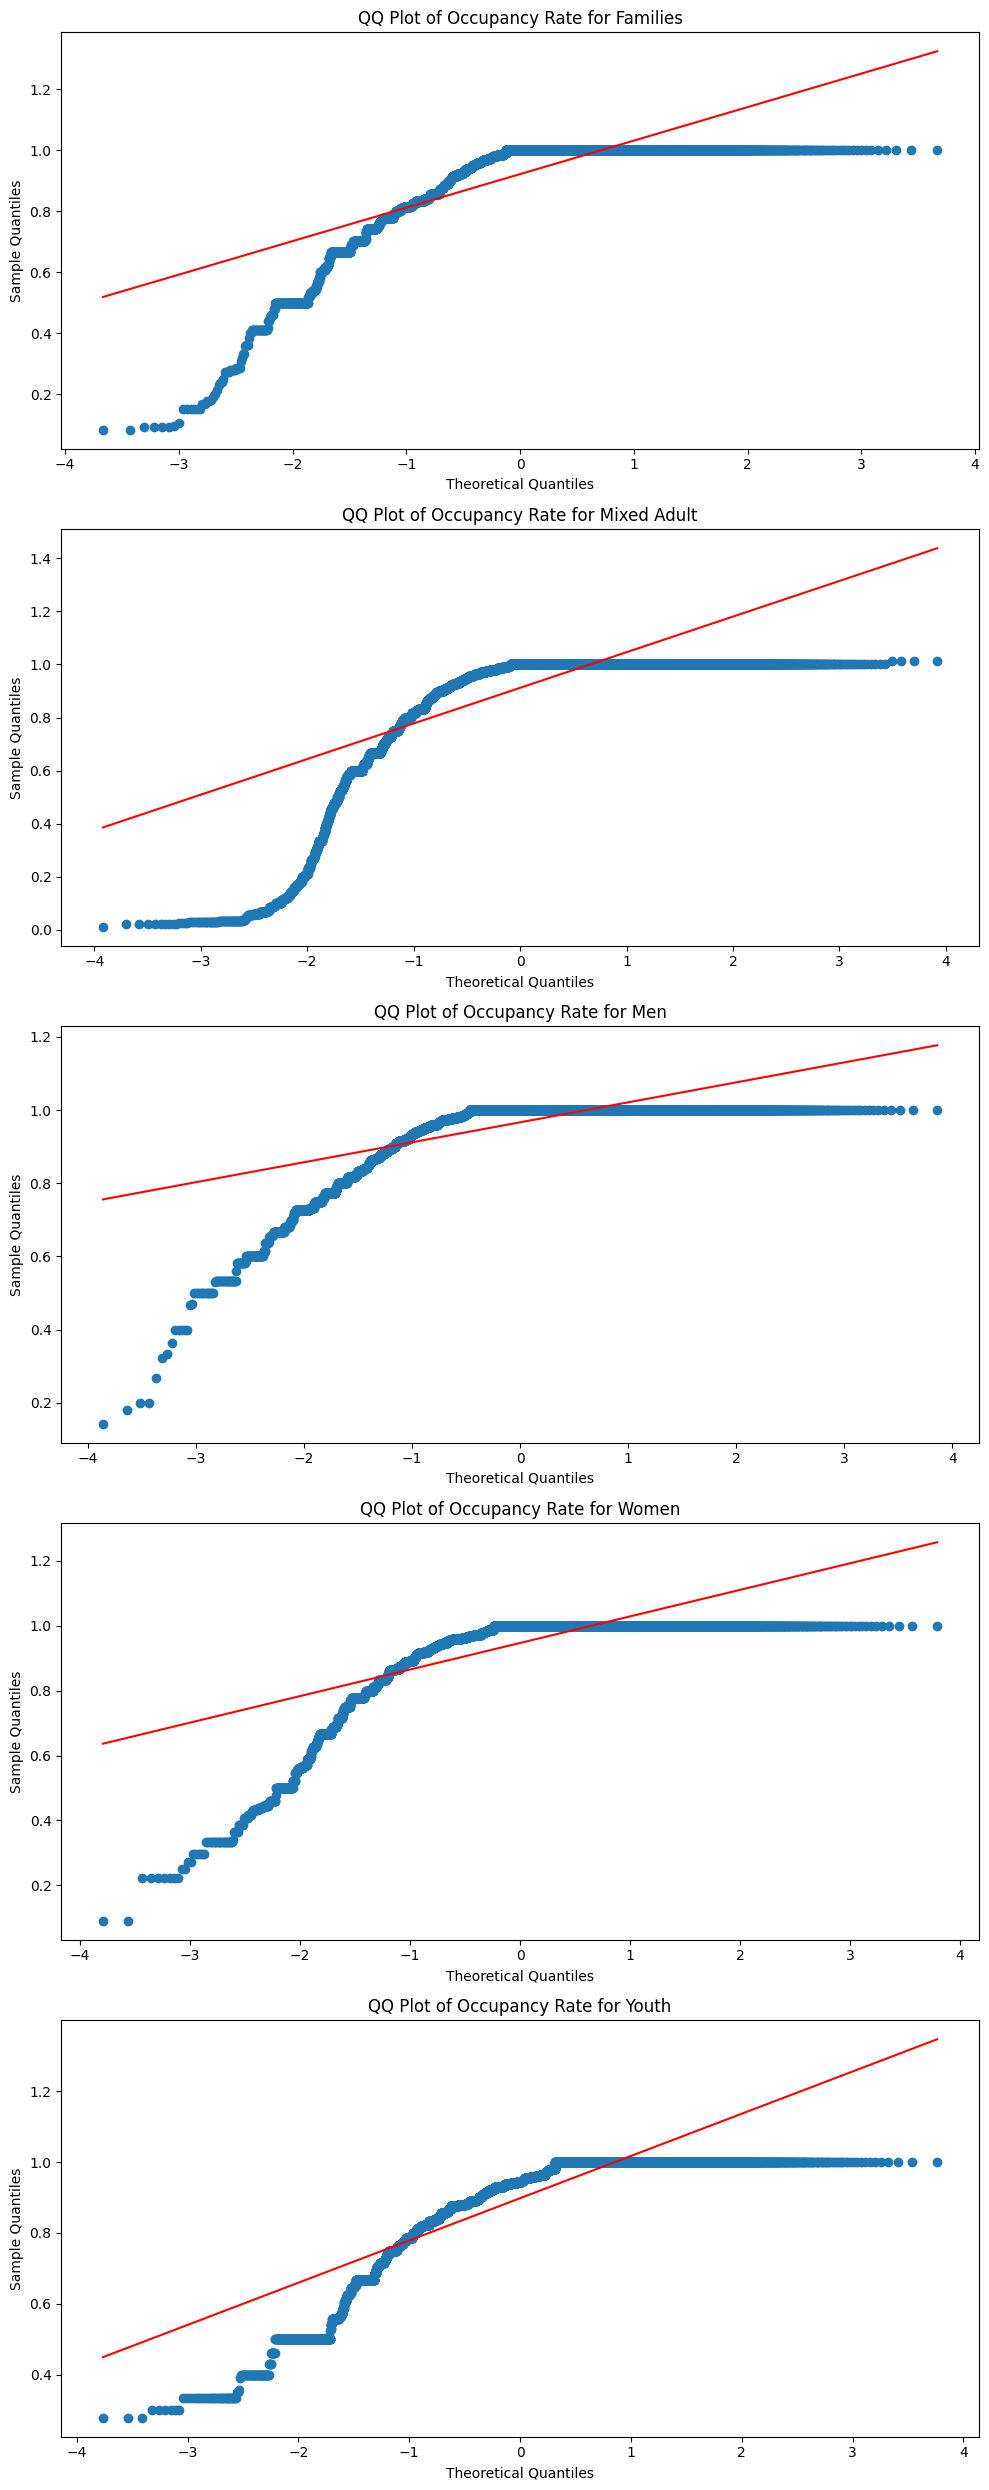

In [20]:
draw_qq_plot_for_var('SECTOR')

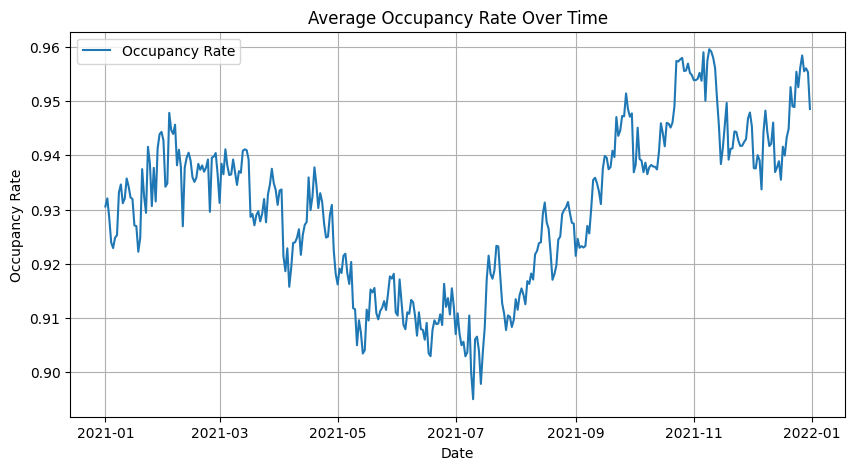

In [22]:
# Group by 'OCCUPANCY_DATE' and calculate the mean 'OCCUPANCY_RATE' for each date
df_grouped = combined_df.groupby('OCCUPANCY_DATE')['OCCUPANCY_RATE'].mean().reset_index()

plt.figure(figsize=[10,5])
plt.grid(True)
plt.plot(df_grouped['OCCUPANCY_DATE'], df_grouped['OCCUPANCY_RATE'], label='Occupancy Rate')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate')
plt.title('Average Occupancy Rate Over Time')
plt.legend(loc=2)
plt.show()

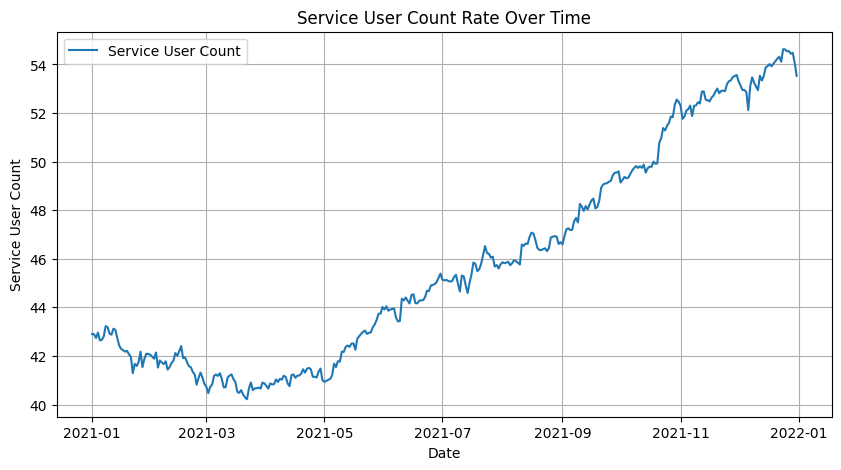

In [24]:
# Group by 'OCCUPANCY_DATE' and calculate the mean 'SERVICE_USER_COUNT' for each date
df_grouped = combined_df.groupby('OCCUPANCY_DATE')['SERVICE_USER_COUNT'].mean().reset_index()

plt.figure(figsize=[10,5])
plt.grid(True)
plt.plot(df_grouped['OCCUPANCY_DATE'], df_grouped['SERVICE_USER_COUNT'], label='Service User Count')
plt.xlabel('Date')
plt.ylabel('Service User Count')
plt.title('Service User Count Rate Over Time')
plt.legend(loc=2)
plt.show()

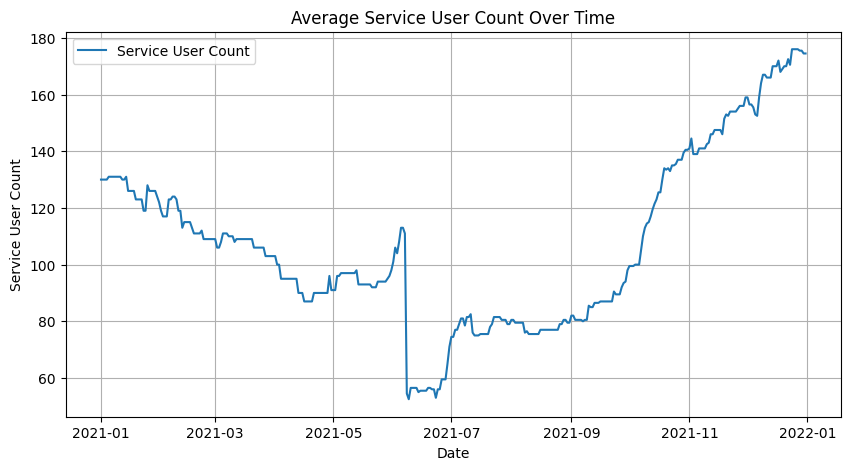

In [84]:
# Group by 'OCCUPANCY_DATE' and calculate the mean 'OCCUPANCY_RATE' for each date
df_grouped = combined_df[combined_df['PROGRAM_AREA'] == 'Temporary Refugee Response'].groupby('OCCUPANCY_DATE')['SERVICE_USER_COUNT'].mean().reset_index()

plt.figure(figsize=[10,5])
plt.grid(True)
plt.plot(df_grouped['OCCUPANCY_DATE'], df_grouped['SERVICE_USER_COUNT'], label='Service User Count')
plt.xlabel('Date')
plt.ylabel('Service User Count')
plt.title('Average Service User Count Over Time')
plt.legend(loc=2)
plt.show()